数据来源于天池赛题：零基础入门数据挖掘 - 二手车交易价格预测

地址：https://tianchi.aliyun.com/competition/entrance/231784/introduction?spm=5176.12281957.1004.1.38b02448ausjSX

## 一、原理介绍

在数据挖掘中，特征工程往往是最为重要也是耗时最长的一个环节。特征工程包括了特征构造、特征筛选、特征降维几大部分。
特征的好坏往往直接决定着模型的精度。
嵌入式（embedding）是一种代表性的特征筛选方法。该方法结合了过滤式和包裹式，通过学习器训练，自动进行了特征选择。

下面将以随机森林对特征进行筛选。

随机森林是以决策树作为的基分类器，CART是一种典型的二叉树。
在构建CART决策树过程中，以Gini指数最小的属性来作为最优划分属性。Gini指数也叫节点不纯度减少平均值，特征的Gini指数越小，
说明该特征就越重要。
Gini指数作为CART算法的分区准则，在决策树的每个内部结点上选择属性

其计算公式为：
$$ Gini(S)=1-\sum_{i=0}^{c-1}p_{i}^{2} $$

公式中S表示数据集，C是类，S是属于类的样本数，$p_{i}=\frac{s_{i}}{S}$ 是类C在集中的相对频度

## 二、代码实现

In [1]:
#加载需要的模块
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
#导入数据
data = pd.read_csv('F:/data/used_car_train_20200313.csv', sep=' ') #sep=' '表示原数据是以空格分隔
data=data[0:100] #由于数据量较大，这里只取前100行

In [3]:
data.columns #查看列名

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [4]:
data=data.dropna(axis=0, how='any') #删除存在缺失值的行，使用参数axis = 0;删除列的参数axis = 1

In [5]:
data.replace("-", "1", inplace=True) #对异常值进行替换

In [9]:
#划分自变量与目标变量
X = data.drop(['SaleID','name','regDate','price','seller','offerType'],axis=1) #从数据集中删除目标变量和与建模不相关的变量
y = data["price"]

In [18]:
#基于随机森林度量各个变量的重要性
clf = RandomForestClassifier()
clf = clf.fit(X,y)
c=clf.feature_importances_
c

array([0.04284212, 0.03158519, 0.01952691, 0.01066158, 0.0088862 ,
       0.03479898, 0.02192666, 0.01143122, 0.05206878, 0.04346119,
       0.04815093, 0.04955708, 0.0453703 , 0.05258164, 0.04739627,
       0.05754426, 0.03899446, 0.04735011, 0.05082278, 0.04286361,
       0.05038958, 0.04540122, 0.05263756, 0.04823006, 0.04552128])

In [19]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(c)[::-1]

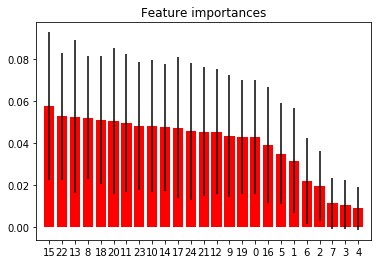

In [20]:
#对变量重要性画图，并依次降序排列
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), c[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
X.columns #这里通过显示列名，便于后面对照特征编号对应的特征名

Index(['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

## 三、结果解读

* 从上面的图片可以看出，排序为23的特征最重要，排序为5的特征最不重要（注意Python默认是从位置0开始计算）。
* 通过人为设定阈值=0.05（根据不同的需求也可以设置为其它值），筛选出特征 ·v_12·、·v_10·、·v_9·、·v_11·